**20L-0961**

### 1. Import the required libraries:
<!-- punctuations -->

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


### 2. Load and preprocess the dataset


In [31]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])


### 3. Implement the K-means algorithm


In [32]:
def initialize_centroids(data, k):
    '''Randomly initialize the centroids from the data points.'''
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def compute_distances(data, centroids):
    '''Compute the distances between each data point and centroids.'''
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    # using euclidean distance
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    return distances

def assign_clusters(distances):
    '''Assign each data point to the closest centroid.'''
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    '''Update the centroids by computing the mean of the points in each
    cluster.'''
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    '''Implement the K-means clustering algorithm.'''
    # Initialize the centroids
    centroids = initialize_centroids(data, k)
    
    # Iterate until convergence or max iterations is reached
    for i in range(max_iterations):
        # Compute the distances between each data point and centroids
        distances = compute_distances(data, centroids)
        
        # Assign each data point to the closest centroid
        clusters = assign_clusters(distances)
        
        # Update the centroids by computing the mean of the points in each cluster
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        # Centroids of newly formed clusters do not change
        if np.allclose(new_centroids, centroids):
            break
        
        # Update the centroids
        centroids = new_centroids
    
    return centroids, clusters

### 4. Evaluate k-means

In [33]:
# Choose the number of clusters, K
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print('Total within-cluster sum of squares: ', wcss)


Total within-cluster sum of squares:  17.46619760906058


### 5. Visualize the clusters


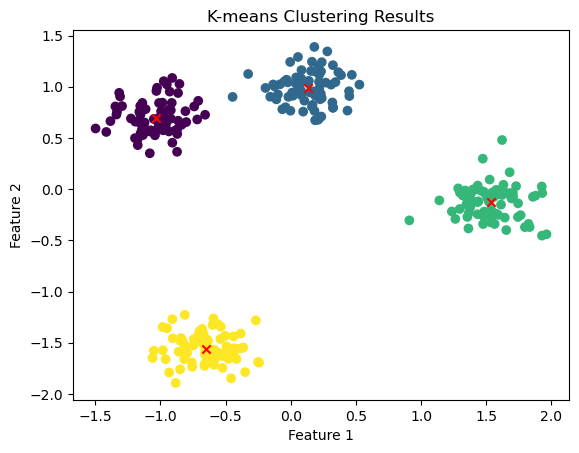

In [34]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()


### 6. For K-Medoids


In [35]:
def initialize_medoids(data, k):
    '''Randomly initialize the medoids from the data points.'''
    medoids = data.copy()
    np.random.shuffle(medoids)
    return medoids[:k]

def compute_dissimilarities(data, medoids):
    '''Compute the dissimilarities between each data point and medoids.'''
    # manhattan distance formula = |x1 - x2| + |y1 - y2|
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0]))
    for i in range(medoids.shape[0]):
        dissimilarities[:, i] = np.sum(np.abs(data - medoids[i]), axis=1)
    return dissimilarities
def assign_clusters(dissimilarities):
    '''Assign each data point to the closest medoid.'''
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    '''Update the medoids by selecting the data point with the minimum sum of
    dissimilarities in each cluster.'''
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[clusters == i]
        dissimilarities = compute_dissimilarities(cluster_data, cluster_data)
        j = np.argmin(np.sum(dissimilarities, axis=1))
        medoids[i] = cluster_data[j]
    return medoids

def k_medoids(data, k, max_iterations=100):
    '''Implement the K-medoids clustering algorithm.'''
    # Initialize the medoids
    medoids = initialize_medoids(data, k)
    
    # Iterate until convergence or max iterations is reached
    for i in range(max_iterations):
        # Compute the dissimilarities between each data point and medoids
        dissimilarities = compute_dissimilarities(data, medoids)
        
        cost = np.sum(np.min(dissimilarities, axis=1))
        # Assign each data point to the closest medoid
        clusters = assign_clusters(dissimilarities)
        
        # Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster
        new_medoids = update_medoids(data, clusters, k)
        
        # Check for convergence
        if np.allclose(new_medoids, medoids):
            break
        
        # Update the medoids
        medoids = new_medoids
    
    return medoids, clusters, cost


### 7. Evaluate K-Medoiods

Total cost:  17.46619760906058


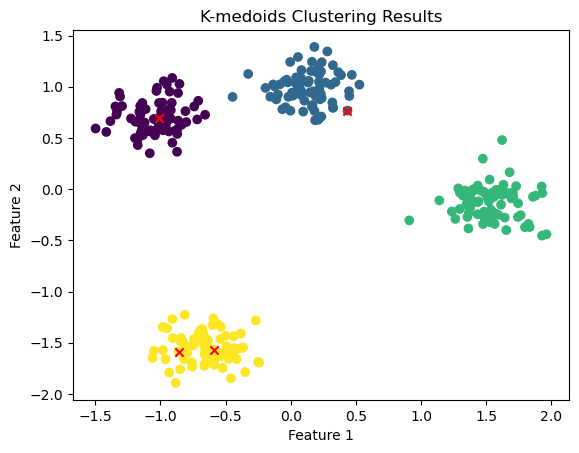

In [37]:
# Choose the number of clusters, K
k = 4
# Run the K-medoids algorithm
medoids, cluster, cost = k_medoids(data_scaled, k)
cost = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print('Total cost: ', cost)

# Plot the dataset with the assigned clusters and medoids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()
